### Course Applied Social Network Analysis in Python
### Assignment1
### Vinicius Henrique | Production engineering

---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [4]:
def answer_one():
        
    df = pd.read_csv('Employee_Movie_Choices.txt', delimiter='\t') #contém os dados em formato de dataframe (fácil manipulação)
    C = nx.from_pandas_dataframe(df, '#Employee', 'Movie') #contém os edges (relacionamentos)
    
    B = nx.Graph()
    B.add_nodes_from(df['#Employee'].unique(), bipartite=0)
    B.add_nodes_from(df['Movie'].unique(), bipartite=1)
    B.add_edges_from(C.edges())
    return B

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [8]:
def answer_two():
    
    df = pd.read_csv('Employee_Movie_Choices.txt', delimiter='\t') #contém os dados em formato de dataframe (fácil manipulação)
    C = nx.from_pandas_dataframe(df, '#Employee', 'Movie') #contém os edges (relacionamentos)
    
    for employee in employees:
        nx.set_node_attributes(C, values={employee: {'type':'employee'}}, name='type')
    for movie in movies:
        nx.set_node_attributes(C, values={movie: {'type':'movie'}}, name='type')

    return C

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

<IPython.core.display.Javascript object>


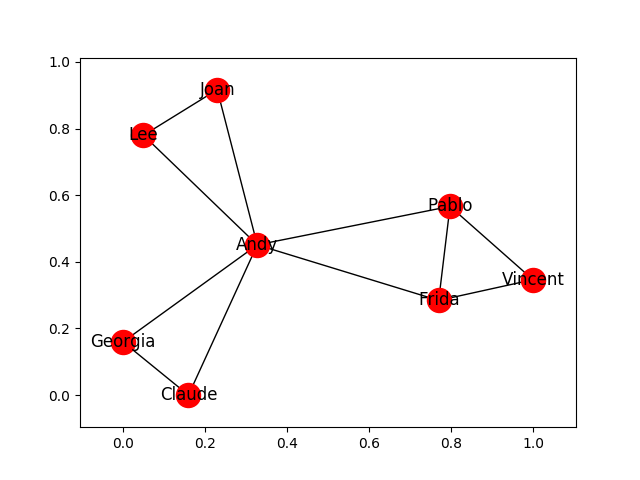

In [9]:
def answer_three():
    
    df = pd.read_csv('Employee_Movie_Choices.txt', delimiter='\t') #contém os dados em formato de dataframe (fácil manipulação)
    C = nx.from_pandas_dataframe(df, '#Employee', 'Movie') #contém os edges (relacionamentos)
    
    G = bipartite.weighted_projected_graph(C, employees)
    
    #%matplotlib notebook
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) #Para plotar o gráfico de projeção
    
    return G

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [25]:
def answer_four():
        
    df = pd.read_csv('Employee_Movie_Choices.txt', delimiter='\t')
    C = nx.from_pandas_dataframe(df, '#Employee', 'Movie')

    G = bipartite.weighted_projected_graph(C, employees)
    weights = nx.get_edge_attributes(G,'weight')

    df = pd.read_csv('Employee_Relationships.txt', delimiter='\t', header=None)
    df['weight'] = 0

    for index, weight in weights.items():
        if index in list(zip(df[0].values,df[1].values)):
            df.loc[(df[0]==index[0]) & (df[1]==index[1]), 'weight'] = weight
        else: 
            df.loc[(df[0]==index[1]) & (df[1]==index[0]), 'weight'] = weight

    a = df[[2,'weight']]
    corr = a.corr()

    return corr.iloc[0,1]

0.78839622217334759